# A CNN with atleast 4 convolutional layers for multi-category image classification tasks. 
* The datasets considered are: MNIST, Fashion-MNIST, CIFAR-10

### Step 0: Setup and Imports

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

import warnings
warnings.filterwarnings('ignore')

print(f'Tensorflow: {tf.__version__}')

Tensorflow: 2.18.0


### Step 1: Load & Preprocess Data

#### MNIST

In [17]:
(x_train_mnist, y_train_mnist),(x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
x_train_mnist = np.expand_dims(x_train_mnist,-1).astype('float32')/255.0
x_test_mnist = np.expand_dims(x_test_mnist,-1).astype('float32')/255.0

#### Fashion-MNIST

In [18]:
(x_train_fm, y_train_fm), (x_test_fm, y_test_fm) = tf.keras.datasets.fashion_mnist.load_data()
x_train_fm = np.expand_dims(x_train_fm, -1).astype('float32')/255.0
x_test_fm = np.expand_dims(x_test_fm, -1).astype('float32')/255.0

#### CIFAR10

In [19]:
(x_train_cifar, y_train_cifar),(x_test_cifar,y_test_cifar) = tf.keras.datasets.cifar10.load_data()
x_train_cifar = x_train_cifar.astype('float32')/255.0
x_test_cifar = x_test_cifar.astype('float32')/255.0

# Flatten the targets
y_train_cifar = y_train_cifar.flatten()
y_test_cifar = y_test_cifar.flatten()

### Step 2: CNN Model(4+ Conv layers)

In [20]:
def build_cnn(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding='same'),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding='same'),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

### Step 3: Compile
- Same for all datasets

In [21]:
def compile_model(model):
    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

### Step 4: Training for Epochs=5, 10, 20

In [22]:
# Record accuracy across epoch settings
def train_and_record(model, x_train, y_train, x_test, y_test, epochs):
    import time
    start = time.time()

    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=128,
        validation_split=.1,
        verbose=2
    )
    end = time.time()
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    print(f"Epochs: {epochs}, Test Accuracy: {test_acc:.4f}, Time: {end-start:.2f} sec")
    return history

### Step 5: Run for Each Dataset

#### MNIST

In [23]:
# MNIST(10 classes)
model_mnist = compile_model(build_cnn((28,28,1), 10))
hist_mnist_5 = train_and_record(model_mnist, x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist, 5)

model_mnist = compile_model(build_cnn((28,28,1), 10))
hist_mnist_10 = train_and_record(model_mnist, x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist, 10)

model_mnist = compile_model(build_cnn((28,28,1),10))
hist_mnist_20 = train_and_record(model_mnist, x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist, 20)

Epoch 1/5
422/422 - 9s - 21ms/step - accuracy: 0.9088 - loss: 0.2837 - val_accuracy: 0.9842 - val_loss: 0.0498
Epoch 2/5
422/422 - 2s - 6ms/step - accuracy: 0.9811 - loss: 0.0662 - val_accuracy: 0.9895 - val_loss: 0.0344
Epoch 3/5
422/422 - 2s - 6ms/step - accuracy: 0.9867 - loss: 0.0450 - val_accuracy: 0.9873 - val_loss: 0.0379
Epoch 4/5
422/422 - 2s - 5ms/step - accuracy: 0.9897 - loss: 0.0329 - val_accuracy: 0.9908 - val_loss: 0.0338
Epoch 5/5
422/422 - 2s - 6ms/step - accuracy: 0.9918 - loss: 0.0269 - val_accuracy: 0.9902 - val_loss: 0.0346
Epochs: 5, Test Accuracy: 0.9902, Time: 18.58 sec
Epoch 1/10
422/422 - 8s - 19ms/step - accuracy: 0.9153 - loss: 0.2658 - val_accuracy: 0.9815 - val_loss: 0.0561
Epoch 2/10
422/422 - 2s - 6ms/step - accuracy: 0.9817 - loss: 0.0621 - val_accuracy: 0.9890 - val_loss: 0.0363
Epoch 3/10
422/422 - 2s - 6ms/step - accuracy: 0.9869 - loss: 0.0437 - val_accuracy: 0.9900 - val_loss: 0.0344
Epoch 4/10
422/422 - 2s - 6ms/step - accuracy: 0.9899 - loss: 0.0

#### Fashion-mnist

In [24]:
# Fashion-mnist
model_fm = compile_model(build_cnn((28,28,1), 10))
hist_model_fm_5 = train_and_record(model_fm, x_train_fm, y_train_fm, x_test_fm, y_test_fm, 5)

model_fm = compile_model(build_cnn((28,28,1), 10))
hist_model_fm_10 = train_and_record(model_fm, x_train_fm, y_train_fm, x_test_fm, y_test_fm, 10)

model_fm = compile_model(build_cnn((28,28,1), 10))
hist_model_fm_20 = train_and_record(model_fm, x_train_fm, y_train_fm, x_test_fm, y_test_fm, 20)

Epoch 1/5
422/422 - 9s - 21ms/step - accuracy: 0.7729 - loss: 0.6205 - val_accuracy: 0.8555 - val_loss: 0.3823
Epoch 2/5
422/422 - 2s - 6ms/step - accuracy: 0.8727 - loss: 0.3523 - val_accuracy: 0.8895 - val_loss: 0.2986
Epoch 3/5
422/422 - 2s - 6ms/step - accuracy: 0.8949 - loss: 0.2925 - val_accuracy: 0.8938 - val_loss: 0.2832
Epoch 4/5
422/422 - 2s - 6ms/step - accuracy: 0.9062 - loss: 0.2582 - val_accuracy: 0.9088 - val_loss: 0.2535
Epoch 5/5
422/422 - 2s - 6ms/step - accuracy: 0.9166 - loss: 0.2304 - val_accuracy: 0.9117 - val_loss: 0.2399
Epochs: 5, Test Accuracy: 0.9076, Time: 19.07 sec
Epoch 1/10
422/422 - 8s - 20ms/step - accuracy: 0.7700 - loss: 0.6226 - val_accuracy: 0.8550 - val_loss: 0.3778
Epoch 2/10
422/422 - 2s - 6ms/step - accuracy: 0.8757 - loss: 0.3479 - val_accuracy: 0.8922 - val_loss: 0.2974
Epoch 3/10
422/422 - 2s - 6ms/step - accuracy: 0.8970 - loss: 0.2875 - val_accuracy: 0.9025 - val_loss: 0.2700
Epoch 4/10
422/422 - 2s - 6ms/step - accuracy: 0.9093 - loss: 0.2

#### CIFAR10

In [25]:
# CIFAR10
model_cifar = compile_model(build_cnn((32,32,3), 10))
hist_model_cifar_5 = train_and_record(model_cifar, x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar, 5)

model_cufar = compile_model(build_cnn((32,32,3), 10))
hist_model_cifar_10 = train_and_record(model_cifar, x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar, 10)

model_cifar = compile_model(build_cnn((32,32,3), 10))
hist_model_cifar_20 = train_and_record(model_cifar, x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar, 20)

Epoch 1/5
352/352 - 8s - 24ms/step - accuracy: 0.3755 - loss: 1.6773 - val_accuracy: 0.5182 - val_loss: 1.3159
Epoch 2/5
352/352 - 3s - 7ms/step - accuracy: 0.5493 - loss: 1.2543 - val_accuracy: 0.6262 - val_loss: 1.0505
Epoch 3/5
352/352 - 3s - 7ms/step - accuracy: 0.6358 - loss: 1.0376 - val_accuracy: 0.6654 - val_loss: 0.9397
Epoch 4/5
352/352 - 3s - 7ms/step - accuracy: 0.6941 - loss: 0.8771 - val_accuracy: 0.7258 - val_loss: 0.7961
Epoch 5/5
352/352 - 2s - 7ms/step - accuracy: 0.7371 - loss: 0.7579 - val_accuracy: 0.7440 - val_loss: 0.7432
Epochs: 5, Test Accuracy: 0.7297, Time: 20.40 sec
Epoch 1/10
352/352 - 3s - 8ms/step - accuracy: 0.7683 - loss: 0.6683 - val_accuracy: 0.7432 - val_loss: 0.7397
Epoch 2/10
352/352 - 2s - 7ms/step - accuracy: 0.7995 - loss: 0.5765 - val_accuracy: 0.7416 - val_loss: 0.7617
Epoch 3/10
352/352 - 2s - 7ms/step - accuracy: 0.8291 - loss: 0.4942 - val_accuracy: 0.7606 - val_loss: 0.7292
Epoch 4/10
352/352 - 2s - 7ms/step - accuracy: 0.8482 - loss: 0.42

### Step 6: Record CPU vs GPU Time

### Step 7: Plot Accuracy vs Epochs


#### MNIST Visualizations

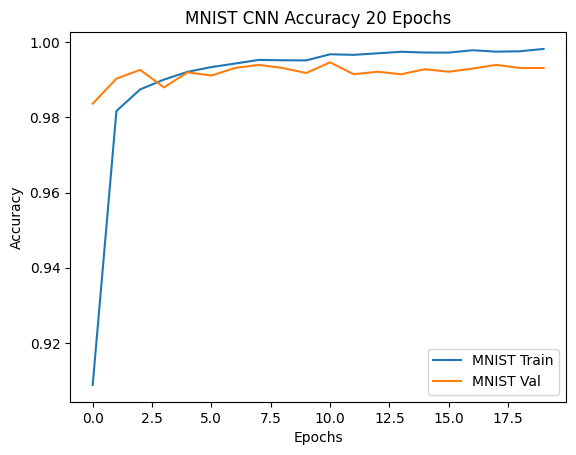

In [26]:
plt.plot(hist_mnist_20.history['accuracy'],label='MNIST Train')
plt.plot(hist_mnist_20.history['val_accuracy'],label='MNIST Val')
plt.title('MNIST CNN Accuracy 20 Epochs')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend();plt.show()

#### Fashion_minst

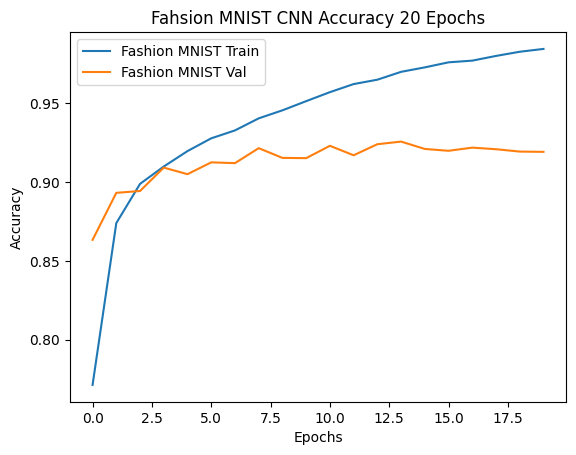

In [27]:
plt.plot(hist_model_fm_20.history['accuracy'],label='Fashion MNIST Train')
plt.plot(hist_model_fm_20.history['val_accuracy'],label='Fashion MNIST Val')
plt.title('Fahsion MNIST CNN Accuracy 20 Epochs')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend();plt.show()

#### CIFAR10

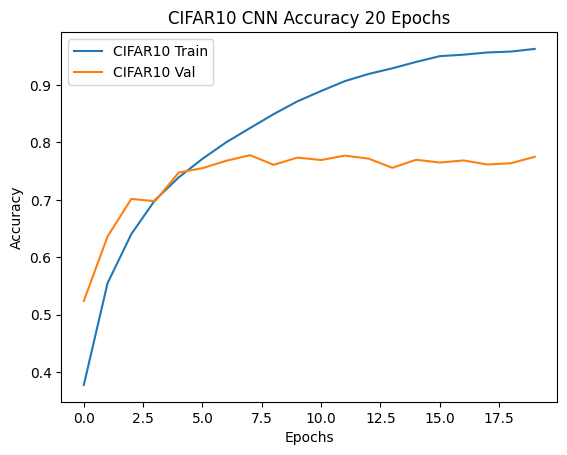

In [28]:
plt.plot(hist_model_cifar_20.history['accuracy'],label='CIFAR10 Train')
plt.plot(hist_model_cifar_20.history['val_accuracy'],label='CIFAR10 Val')
plt.title('CIFAR10 CNN Accuracy 20 Epochs')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend();plt.show()